# Deep Learning Project: Image Classification

## Step 1: Data Collection
For Data Collection, we use a chrome extension known as Fatkun Batch download image, through which we can download a batch of photos from google photos, after searching for the person who's face we would like our algorithm to "learn". Once downloaded, we store all of the images as jpegs in directories. This is our dataset

## Step 2: Data Cleaning
We will be using OpenCV, an image processing library in Python, as well as Haar Cascade algorithm, to process the image and detect prominent facial characteristics, and discard the iamges that show no clear features or detections.

In [3]:
#import all libraries and modules
import os
import shutil
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 

In [4]:
#Initialize the cascade classifiers, using xmls downloaded and obtained from the CV2 github under haar cascade directory
#We will only be detecting the default face as well as eye features
face_cascade = cv2.CascadeClassifier('C:\\Users\\hp\\Desktop\\rapclassifier\\model\\opencv\\haarcascades\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:\\Users\\hp\\Desktop\\rapclassifier\\model\\opencv\\haarcascades\\haarcascade_eye.xml')

In [5]:
#Function to detect the face and eye features
def get_cropped_image(image_path):
    img = cv2.imread(image_path) #Obtain the image
    if(img is not None): #If image is accesible
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert image color to gray
        faces = face_cascade.detectMultiScale(gray, 1.3, 5) #obtain the facial portion of the image
        for(x, y, w, h) in faces: #iterate through that portion
            roi_gray = gray[y:y+h, x:x+w] #obtain the region of interest, i.e. the cropped facial area of that image
            roi_color = img[y:y+h, x:x+w] #where only the facial region is present
            eyes = eye_cascade.detectMultiScale(roi_gray) #do the same to detect the eyes
            if len(eyes) >= 2: #if at least two eyes are detected 
                return roi_color #return the region of interest 

In [6]:
#intialize paths
path_to_data = ".\\imagesdataset"
path_to_cropped_data = ".\\imagesdataset\\cropped"

In [7]:
#Using OS, get the image dataset directories
img_dirs = [] #initialize
os.chdir('C:\\Users\\hp\\Desktop\\rapclassifier\\model') #change current directory for ease of access and coding
for entry in os.scandir(path_to_data): #scan directory
    if entry.is_dir(): #if it exists
        img_dirs.append(entry.path) #store the directories in img dir list by appening

In [8]:
#Using shutil, delete the cropped directory if it already exitst (for multiple runs)
#and using OS, create that directory to store the cropped images
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [9]:
#Intialize cropped image directories list and a ditionary for the file names in which each rapper
#folder is the key and the values are every single image stored inside that folder
cropped_image_dirs = []
rapper_file_names = {}
#iterate through image directory array
for img_dir in img_dirs:
    count = 1 #initialize iterator
    rapper_name = img_dir.split('\\')[-1] #obtain rapper names
    rapper_file_names[rapper_name] = [] #intiialize keys for key value pair
    for entry in os.scandir(img_dir): #iterate through the directory
        roi_color = get_cropped_image(entry.path) #obtain cropped facial portion i.e. region of interest 
        if roi_color is not None: #if it is detected
            cropped_folder = path_to_cropped_data + "\\" + rapper_name #create new directory in cropped directory
            if not os.path.exists(cropped_folder): #if path doesn't already exist
                os.makedirs(cropped_folder) #create the new directory in cropped directory to store each rapper's cropped images
                cropped_image_dirs.append(cropped_folder) #append to the dictionary
                print("Generating cropped images in folder: ", cropped_folder) #status updates provided
            cropped_file_name = rapper_name + str(count) + ".png" #intialize name for each image seperately as a png
            cropped_file_path = cropped_folder + "\\" + cropped_file_name #intialize file path
            cv2.imwrite(cropped_file_path, roi_color) #write and store the image in the directory
            rapper_file_names[rapper_name].append(cropped_file_path) #append the value to the dictionary
            count += 1 #iterate

Generating cropped images in folder:  .\imagesdataset\cropped\drake
Generating cropped images in folder:  .\imagesdataset\cropped\eminem
Generating cropped images in folder:  .\imagesdataset\cropped\ice_spice
Generating cropped images in folder:  .\imagesdataset\cropped\nicki_minaj
Generating cropped images in folder:  .\imagesdataset\cropped\travis_scott


After this step, manual cleaning must take place for remediation. This can be done through a variety of techniques, such as hiring a workforce, or crowd sourcing platforms. In our case, the data is not too large, hence we can manually clean it ourselves by going through the dataset directories and removing unwanted data or anomalies

## Step 3: Feature Engineering
A technique which is most commonly used and effective, known as Wavelet transformation, will be used to extract facial features and create datasets to train the model

In [22]:
#import libraries
import numpy as np
import pywt
import cv2

In [23]:
#wavelet transformation function from stackoverflow
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H #transformed image

In [26]:
rapper_file_names = {}
for img_dir in cropped_image_dirs:
    rapper_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    rapper_file_names[rapper_name] = file_list

{'drake': ['.\\imagesdataset\\cropped\\drake\\drake1.png',
  '.\\imagesdataset\\cropped\\drake\\drake10.png',
  '.\\imagesdataset\\cropped\\drake\\drake11.png',
  '.\\imagesdataset\\cropped\\drake\\drake12.png',
  '.\\imagesdataset\\cropped\\drake\\drake13.png',
  '.\\imagesdataset\\cropped\\drake\\drake14.png',
  '.\\imagesdataset\\cropped\\drake\\drake17.png',
  '.\\imagesdataset\\cropped\\drake\\drake18.png',
  '.\\imagesdataset\\cropped\\drake\\drake19.png',
  '.\\imagesdataset\\cropped\\drake\\drake2.png',
  '.\\imagesdataset\\cropped\\drake\\drake20.png',
  '.\\imagesdataset\\cropped\\drake\\drake21.png',
  '.\\imagesdataset\\cropped\\drake\\drake22.png',
  '.\\imagesdataset\\cropped\\drake\\drake25.png',
  '.\\imagesdataset\\cropped\\drake\\drake26.png',
  '.\\imagesdataset\\cropped\\drake\\drake27.png',
  '.\\imagesdataset\\cropped\\drake\\drake28.png',
  '.\\imagesdataset\\cropped\\drake\\drake3.png',
  '.\\imagesdataset\\cropped\\drake\\drake30.png',
  '.\\imagesdataset\\crop

In [27]:
#Assign each rapper with a number using a dictionary, so we can use it later in the y classifier
rapper_dict = {}
count = 0 
for rapper_name in rapper_file_names.keys():
    rapper_dict[rapper_name] = count
    count += 1

In [29]:
#obtain the layered images of the raw image along with the wavelet images to for our X and Y for model training
x = [] #initilaize x
y = [] #initialize y
for rapper_name, training_files in rapper_file_names.items(): #iterate through each image file for each rapper
    for training_image in training_files: #iterate through each image
        img = cv2.imread(training_image) #read the image
        scaled_raw_img = cv2.resize(img, (32, 32)) #scale the image
        img_har = w2d(img, 'db1', 5) #obtain the wavelet transformed image through our function
        scaled_img_har = cv2.resize(img_har, (32, 32)) #scale the wavelet transformed image
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1))) #layer both the obtained images
        x.append(combined_img) #append obtained image to x
        y.append(rapper_dict[rapper_name]) #append rapper name indicator digit to y
x = np.array(x).reshape(len(x), 4096).astype(float) #convert the value to float for sklearn 

(221, 4096)

## Step 4: Model Training
Now that we have obtained X and Y, we are ready to train our model. We will use support vector machines with rbf kernel tuned with heuristic finetuning to do the same 

In [38]:
#import modules and libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0) #create the train test set split
pipe = Pipeline([('scaler', StandardScaler()), ('scv', SVC(kernel = 'linear', C = 10))]) #Use pipeline to scale. svm classification, parameters chosen are random
pipe.fit(x_train, y_train) #fit the data to the classifier
print(classification_report(y_test, pipe.predict(x_test))) #print out a classification report 

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       1.00      0.25      0.40         4
           2       0.92      0.79      0.85        14
           3       0.76      0.96      0.85        26
           4       0.50      0.50      0.50         2

    accuracy                           0.82        56
   macro avg       0.83      0.66      0.70        56
weighted avg       0.85      0.82      0.81        56



## Step 5: Model Selection
We use grid search cross validation to try out different models and select the one with best performance

In [57]:
#import modules and libraries
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

In [54]:
#define different candidate models
model_params = {
    'svm': { #Support vector machine
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : { #parameters
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': { #random forest
        'model': RandomForestClassifier(),
        'params' : { #parameters
            'randomforestclassifier__n_estimators': [1,5,10]
        } 
    },
    'logistic_regression' : { #logistic regression
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': { #parameters
            'logisticregression__C': [1,5,10]
        } 
    }
}

In [55]:
#Grid search CV
scores = [] 
best_estimators = {} 
for algo, mp in model_params.items(): #iterate through each parameter and combination
    pipe = make_pipeline(StandardScaler(), mp['model']) #scale using pipeline
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False) #k tenfold cross validation
    clf.fit(x_train, y_train) #train the models
    scores.append({ #append the best scores
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params']) #create a dataframe of the recieved data
df #use this to note the cross validation score

,model,best_score,best_params
0,svm,0.836364,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.787879,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.842424,{'logisticregression__C': 1}


In [56]:
#find out the scores on the test sets
print(best_estimators['svm'].score(x_test, y_test))
print(best_estimators['random_forest'].score(x_test, y_test))
print(best_estimators['logistic_regression'].score(x_test, y_test))

0.8392857142857143
0.8392857142857143
0.8035714285714286


Text(95.72222222222221, 0.5, 'ACTUAL')

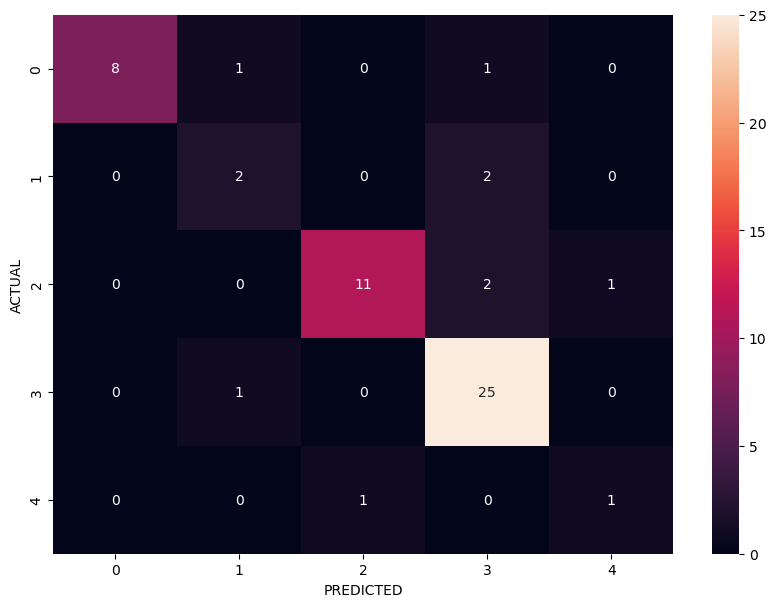

In [58]:
#svm is giving the highest score in both the cases hence it is the definite answer 
#use seaborn to plot the confusion matrix
best_classifier = best_estimators['svm']
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_test, best_classifier.predict(x_test)), annot = True)
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')

## Step 6: Saving the model

In [63]:
#import modules and libraries
import joblib
import json

In [61]:
#save trained model
joblib.dump(best_classifier, 'saved_model.pkl') #save the model as a pickle in a file

['saved_model.pkl']

In [65]:
#save class dictionary
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(rapper_dict))